# Análisis de ventas

## 1. Funciones base

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

def redondear_cantidad(cantidad, num_decimales = 2):
    return round(cantidad, num_decimales)

def filtrar_columna(df:pd.DataFrame, columna:str, indice:str):
    return df.loc[df[columna] == indice]

def calculos_agrupados_df(df:pd.DataFrame):
    ingreso_total = redondear_cantidad(df['Total'].sum())
    cogs_total = redondear_cantidad(df['cogs'].sum())
    utilidad_total = redondear_cantidad(df['gross income'].sum())
    num_ventas = df['Invoice ID'].count()

    return {
        'Ingreso_Total': ingreso_total,
        'COGS_Total': cogs_total,
        'Utilidad_Total': utilidad_total,
        #'Utilidad_MArgen': redondear_cantidad((utilidad_total /ingreso_total)*100 ),
        'Numero_Compras': num_ventas,
        'Ingreso_Promedio': redondear_cantidad(ingreso_total / num_ventas),
        'Costo_Promedio': redondear_cantidad(cogs_total / num_ventas),
        'Utilidad_Promedio': redondear_cantidad(utilidad_total / num_ventas),
    }

def resumen_columna(df:pd.DataFrame, columna:str):
    resumen_categoria = {}
    for valor in np.sort(df[columna].unique()):
        df_filtrado = filtrar_columna(df, columna, valor)
        resumen_categoria[valor] = calculos_agrupados_df(df_filtrado)
    return pd.DataFrame.from_dict(resumen_categoria, orient='index')

def grafica_df(df:pd.DataFrame, title="Gráficas"):

    gs = gridspec.GridSpec(3,3)
    fig = plt.figure(figsize=(15,10))
    fig.suptitle(title)
    plt

    ax1=fig.add_subplot(gs[0,0])
    ax2=fig.add_subplot(gs[0,1])
    ax3=fig.add_subplot(gs[0,2])
    ax4=fig.add_subplot(gs[1,0])
    ax5=fig.add_subplot(gs[1,1])
    ax6=fig.add_subplot(gs[1,2])
    ax7=fig.add_subplot(gs[2,0])
    ax8=fig.add_subplot(gs[2,1])
    ax9=fig.add_subplot(gs[2,2])


    ax1.bar(df.index, df['Ingreso_Total'], 0.3)
    ax1.set_ylabel("Ventas totales")
    ax1.tick_params(axis='x', labelrotation=90)

    ax2.bar(df.index, df['COGS_Total'], 0.3)
    ax2.set_ylabel("Costo de ventas totales")
    ax2.tick_params(axis='x', labelrotation=90)

    ax3.bar(df.index, df['Utilidad_Total'], 0.3)
    ax3.set_ylabel("Utilidad total")
    ax3.tick_params(axis='x', labelrotation=90)

    ax4.bar(df.index, df['Numero_Compras'], 0.3, color='Green')
    ax4.set_ylabel("Numero de compras")
    ax4.tick_params(axis='x', labelrotation=90)

    ax7.bar(df.index, df['Ingreso_Promedio'], 0.3, color='Orange')
    ax7.set_ylabel("Venta Promedio")
    ax7.tick_params(axis='x', labelrotation=90)

    ax8.bar(df.index, df['Costo_Promedio'], 0.3, color='Orange')
    ax8.set_ylabel("Costo de Venta Promedio")
    ax8.tick_params(axis='x', labelrotation=90)

    ax9.bar(df.index, df['Utilidad_Promedio'], 0.3, color='Orange')
    ax9.set_ylabel("Utilidad por Venta")
    ax9.tick_params(axis='x', labelrotation=90)


    plt.tight_layout()
    #plt.show()


## 2. Carga de datos

In [150]:

archivo = './supermarket_sales.csv'
df = pd.read_csv(archivo, parse_dates=True)
df['datetime'] =  pd.to_datetime(df['Date']+' '+ df['Time'])

dfBranch = resumen_columna(df, 'Branch')
dfProducts = resumen_columna(df, 'Product line')
dfGender = resumen_columna(df, 'Gender')


## 3. Análisis

### A) Por Tienda

   Ingreso_Total  COGS_Total  Utilidad_Total  Numero_Compras  \
A      106200.37   101143.21         5057.16             340   
B      106197.67   101140.64         5057.03             332   
C      110568.71   105303.53         5265.18             328   

   Ingreso_Promedio  Costo_Promedio  Utilidad_Promedio  
A            312.35          297.48              14.87  
B            319.87          304.64              15.23  
C            337.10          321.05              16.05  


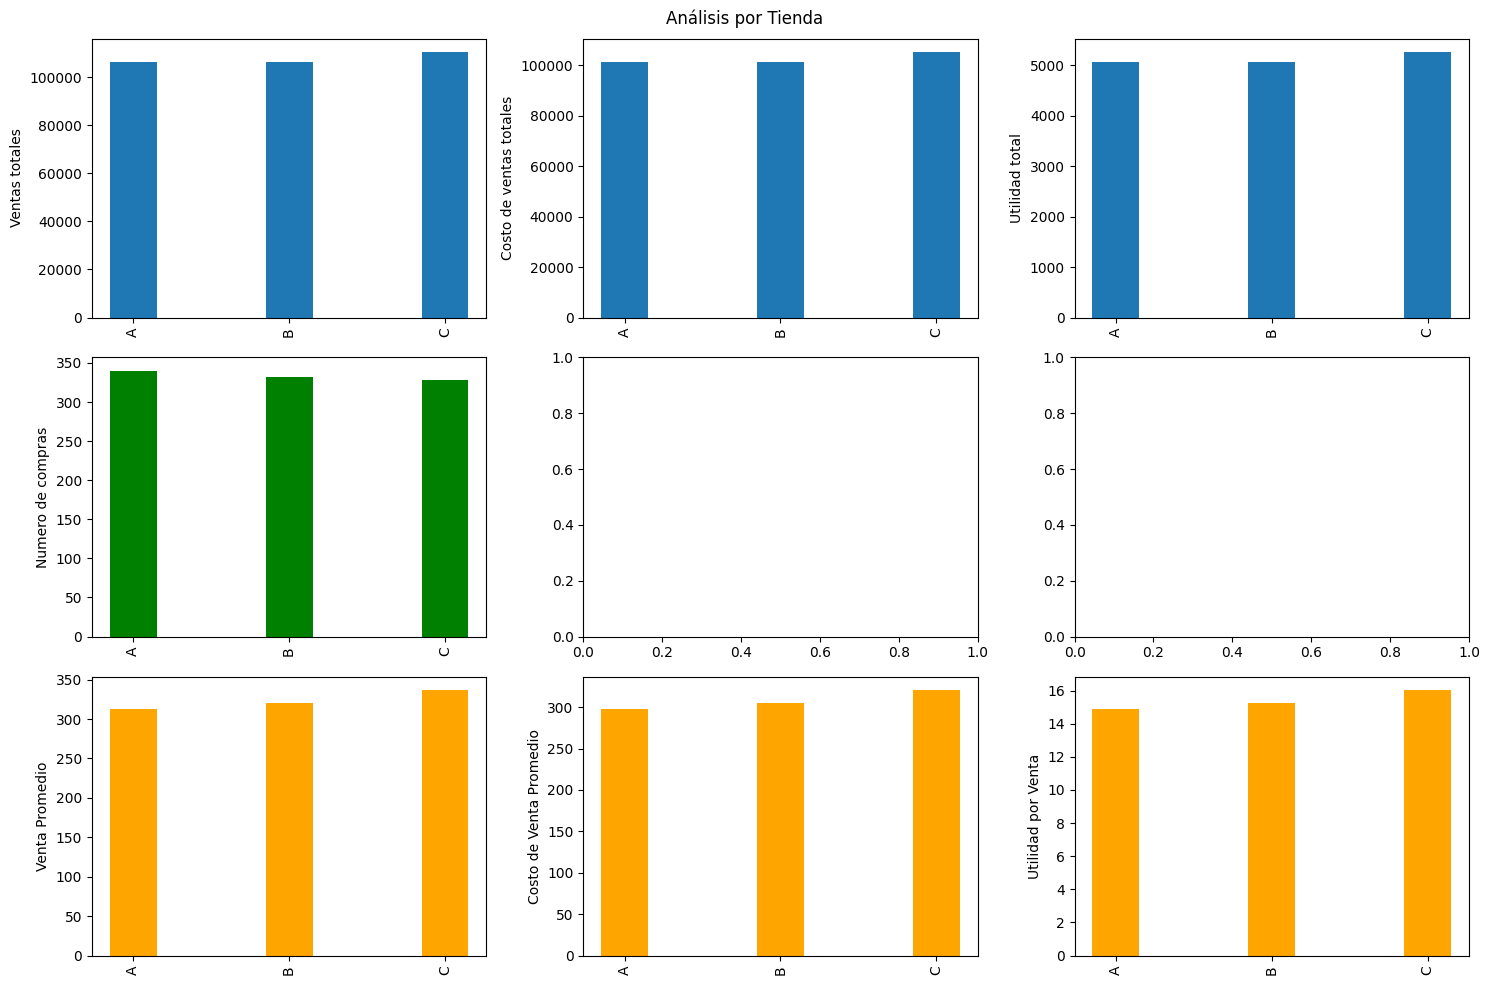

In [151]:
grafica_df(dfBranch, 'Análisis por Tienda')
print(dfBranch)

- La Tienda que más ingreso tiene es la C con un ingreso por $110,568.71 mientras la que menos generó fue la tienda B con $106,197.67 lo que representa una diferencia de tan solo $4371.71 el 3.95% de la tienda C.
Las gráficas muestran un comportamiento muy homogéneo no solamente en el ingreso, sino también en en el Costo de Ventas y la Utilidad.

- En el caso de los promedios vemos que las ventas promedio también fueron mayores en C con $337.10 mientras que la que menos promedio tuvo fue la tienda A con $312.35

### B) Por Producto

                        Ingreso_Total  COGS_Total  Utilidad_Total  \
Electronic accessories       54337.53    51750.03         2587.50   
Fashion accessories          54305.90    51719.90         2586.00   
Food and beverages           56144.84    53471.28         2673.56   
Health and beauty            49193.74    46851.18         2342.56   
Home and lifestyle           53861.91    51297.06         2564.85   
Sports and travel            55122.83    52497.93         2624.90   

                        Numero_Compras  Ingreso_Promedio  Costo_Promedio  \
Electronic accessories             170            319.63          304.41   
Fashion accessories                178            305.09          290.56   
Food and beverages                 174            322.67          307.31   
Health and beauty                  152            323.64          308.23   
Home and lifestyle                 160            336.64          320.61   
Sports and travel                  166            332.07    

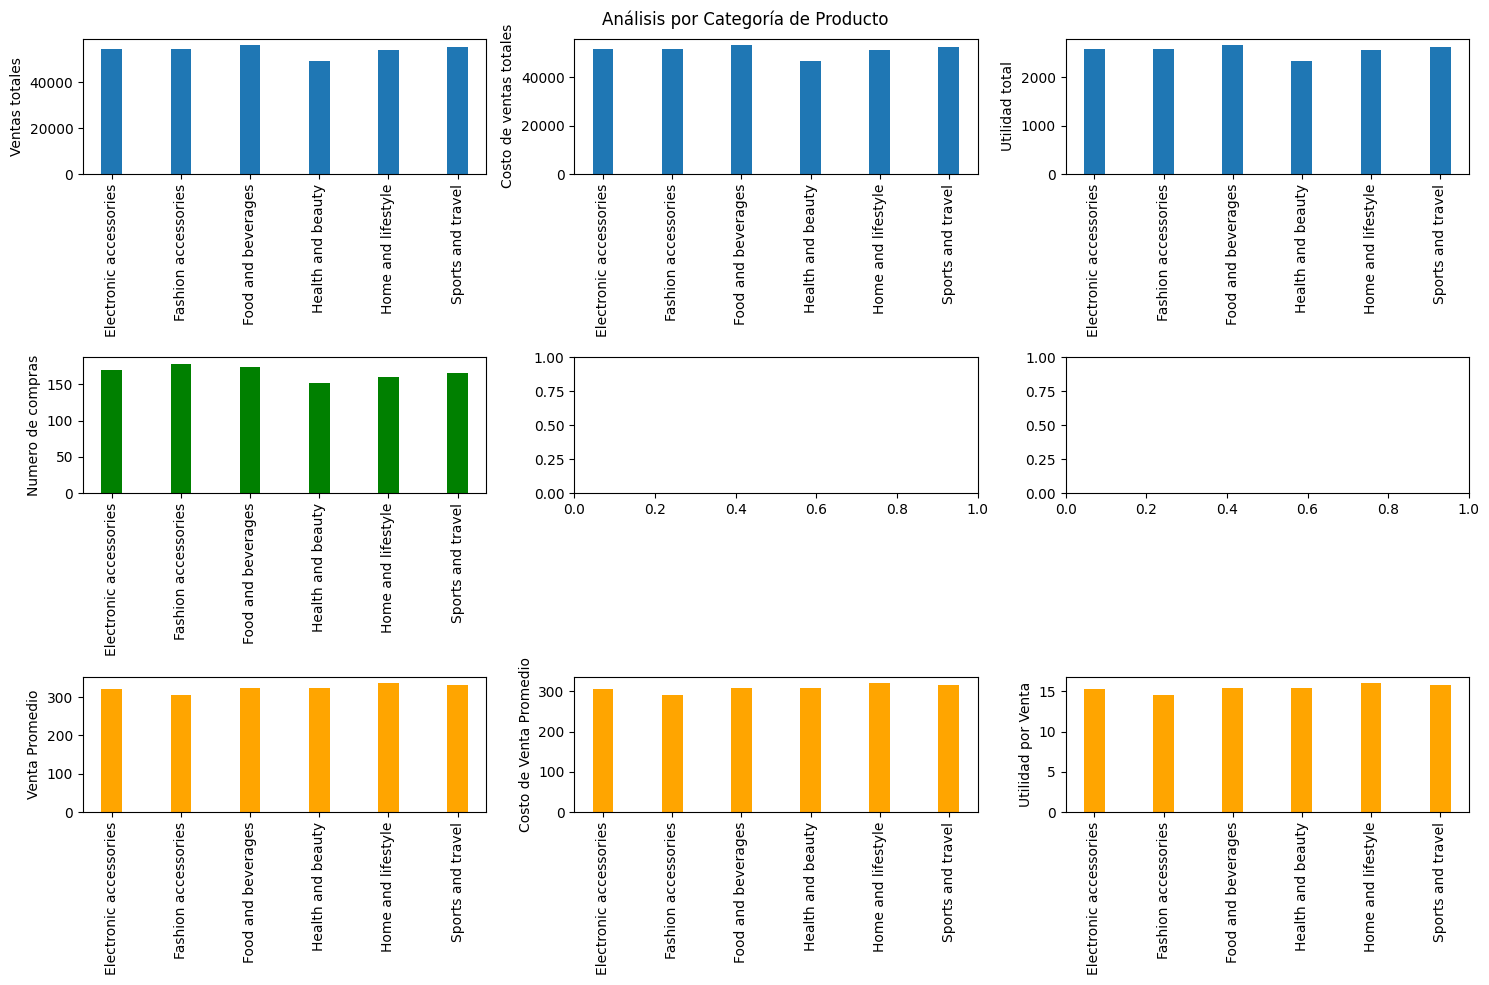

In [152]:
grafica_df(dfProducts, 'Análisis por Categoría de Producto')
print(dfProducts)

- La categoría que más ingreso generó fue Comidas y bebidas con $56,144.84 y la que menos generó fue Salud y Belleza con $49,139.74, la diferencia entre ambas categorías es de $7,005.10 lo que representa el 12.47% de las ventas de Comida y bebidas, este comportamiento también se presenta con el costo de ventas y la utilidad representando ambos datos  12.38% de la categoría más vendida


- En el caso de los promedios vemos que las ventas promedio son mayores para la categoría de Hogar y vida con $336.64 y la que menos repreenta es Accesorios con $305.9, la difrencia es de $30.74 pesos, presentando el 9.13%

### C) Por Género

        Ingreso_Total  COGS_Total  Utilidad_Total  Numero_Compras  \
Female      167882.92   159888.50         7994.42             501   
Male        155083.82   147698.88         7384.94             499   

        Ingreso_Promedio  Costo_Promedio  Utilidad_Promedio  
Female            335.10          319.14              15.96  
Male              310.79          295.99              14.80  


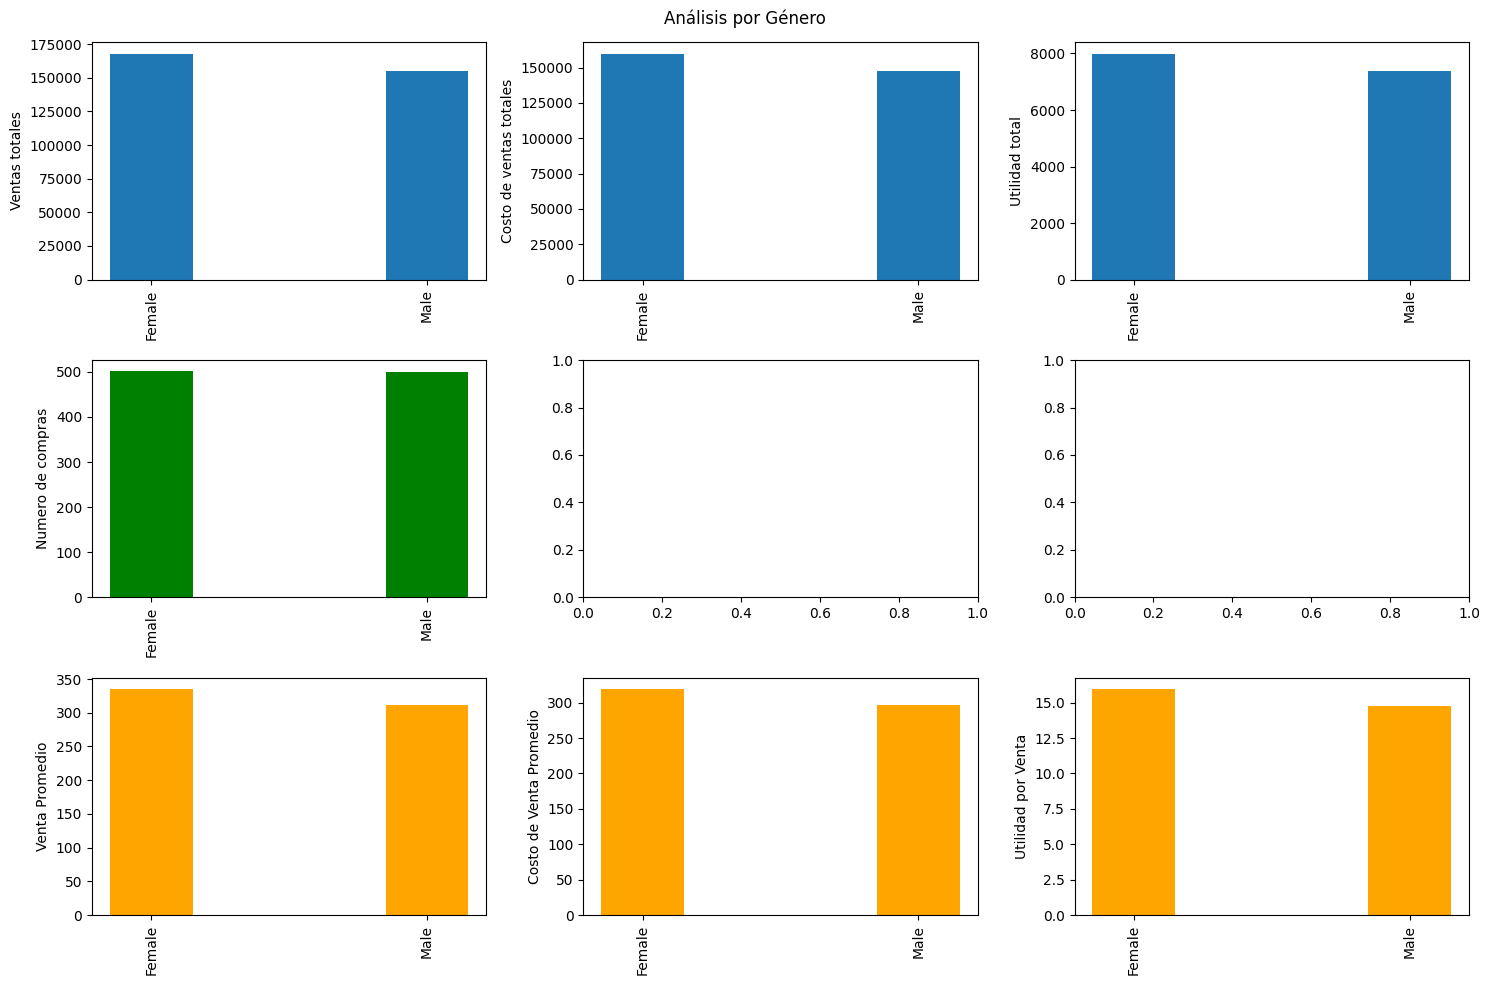

In [153]:
grafica_df(dfGender, 'Análisis por Género')
print(dfGender)

- Para el género se observa que las mujeres superan a los hombres por $12,799.10 lo que representa el 7.62% del monto mayor. 

- En el caso de los promedios vemos que las ventas promedio las mujeres también superan a los hombres con ventas de 335.10 y 310.79 respectivamente (diferencia de $24.31 o 7.25%)

## 4. Conclusión

- El comporatamiendo del corporativo es muy homogeneo en las categorías de Género, Productos y Tiendas. Se observa que en cada categoría sus valores no presentan una gran diferencia entre el valor máximo y mínimo, por lo que cabe considerar que se podrían analizar más categorías para ver si se puede encontrar algún patrón de mejora que requiera una mayor urgencia (Analizar las compras de los suscriptores y los no suscriptores o el método de pago).

- Actualmente se puede concluir que con las categorías analizadas no se recomienda una acción urgente sino que queda a decisión de los ejecutivos ver qué área quieren mejorar en función de otros factores como la logística (con el objetivo de bajar los costos por ejemplo) 
  